In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Read in the cleaned data to dataframe
df = pd.read_csv("C://Users//brand//OneDrive//Desktop//Data Analysis Bootcamp//UCI-VIRT-DATA-PT-09-2023-U-LOLC//Project-1//Data//CleanedSchoolData.csv")

In [3]:
# Display dataframe
df.head()

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Average Score
0,female,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.0
1,female,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,82.0
2,female,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.0
3,male,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,48.0
4,male,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.0


In [4]:
# Display general information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               29451 non-null  object 
 1   ParentEduc           29451 non-null  object 
 2   LunchType            29451 non-null  object 
 3   TestPrep             29451 non-null  object 
 4   ParentMaritalStatus  29451 non-null  object 
 5   PracticeSport        29451 non-null  object 
 6   IsFirstChild         29451 non-null  object 
 7   NrSiblings           29451 non-null  float64
 8   TransportMeans       29451 non-null  object 
 9   WklyStudyHours       29451 non-null  object 
 10  MathScore            29451 non-null  int64  
 11  ReadingScore         29451 non-null  int64  
 12  WritingScore         29451 non-null  int64  
 13  Average Score        29451 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.1+ MB


# Statistical Analysis

In [5]:
# Compute a quick statistical summary based on average scores for each parent education
df.groupby('ParentEduc')['Average Score'].describe()

,count,mean,std,min,25%,50%,75%,max
ParentEduc,,,,,,,,
associate's degree,7122.0,69.456332,14.208554,14.0,60.0,70.0,80.0,100.0
bachelor's degree,3251.0,72.211320,13.911742,18.0,63.0,72.0,83.0,100.0
high school,5475.0,65.734247,14.033706,10.0,56.0,66.0,76.0,100.0
master's degree,1939.0,74.888087,13.771179,25.0,66.0,76.0,85.0,100.0
some college,6369.0,68.050243,14.101859,12.0,59.0,68.0,78.0,100.0
some high school,5295.0,63.894429,14.318322,9.0,54.0,64.0,74.0,100.0


In [6]:
# Find the average test score for each level of education
avg_scores = df.groupby('ParentEduc')['Average Score'].describe()['mean'].sort_values(ascending=False)
avg_scores

ParentEduc
master's degree       74.888087
bachelor's degree     72.211320
associate's degree    69.456332
some college          68.050243
high school           65.734247
some high school      63.894429
Name: mean, dtype: float64

In [7]:
# create dataframe containing average score for highest and lowest education level
high_low_df = pd.DataFrame({"Education": ["some high school", "master's degree"],"Scores": [avg_scores.min(), avg_scores.max()], }, index = range(2))
high_low_df

,Education,Scores
0,some high school,63.894429
1,master's degree,74.888087


In [8]:
# Grab all scores for each type of parent education
group0 = df[df['ParentEduc'] == 'some high school']["Average Score"]
group1 = df[df['ParentEduc'] == 'high school']["Average Score"]
group2 = df[df['ParentEduc'] == 'some college']["Average Score"]
group3 = df[df['ParentEduc'] == "associate's degree"]["Average Score"]
group4 = df[df['ParentEduc'] == "bachelor's degree"]["Average Score"]
group5 = df[df['ParentEduc'] == "master's degree"]["Average Score"]

In [9]:
# Perform the ANOVA to compute the pvalue
stats.f_oneway(group0, group1, group2, group3, group4)

F_onewayResult(statistic=233.55421198990257, pvalue=1.452433111352144e-197)

# Data Visualization

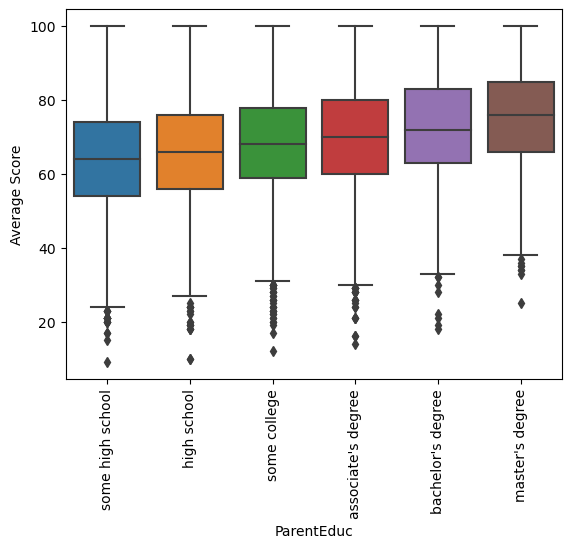

In [10]:
# Make a box plot of average scores for each level of education
sns.boxplot(data=df, x='ParentEduc', y = 'Average Score', order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"])
plt.xticks(rotation=90)
plt.show()

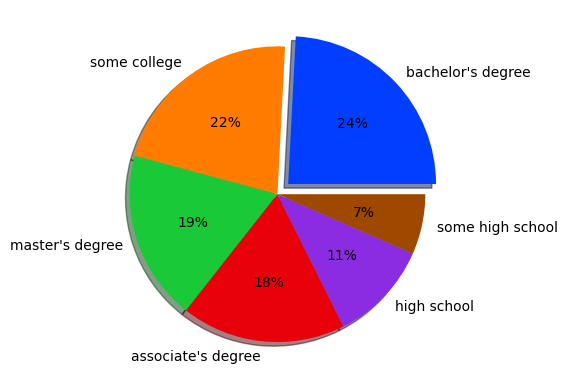

In [11]:
# Make a pie chart showing the distribution of parent education
palette_color = sns.color_palette('bright')
explode = [0.1, 0, 0, 0, 0, 0]
educ_counts = df['ParentEduc'].value_counts()
plt.pie(x=educ_counts, labels = list(df['ParentEduc'].unique()),
        colors=palette_color, autopct='%.0f%%', explode=explode, shadow = True)
plt.show()

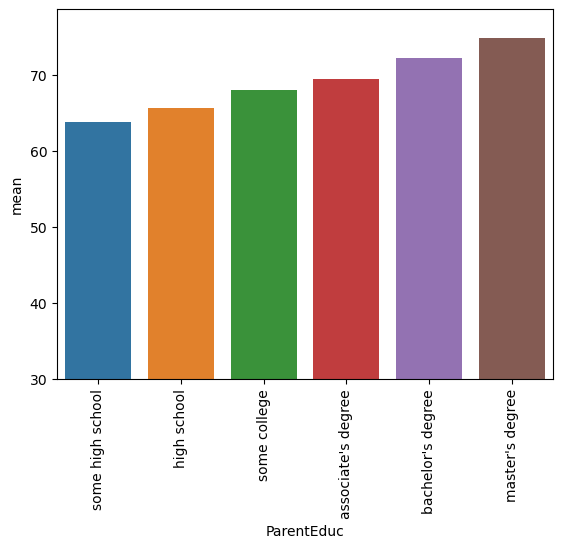

In [12]:
# Bar plot visualizing average test scores for each level of education
sns.barplot(x= avg_scores.index, y = avg_scores, order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"])
plt.xticks(rotation=90)
plt.ylim(30)
plt.show()

<Axes: xlabel='Education', ylabel='Scores'>

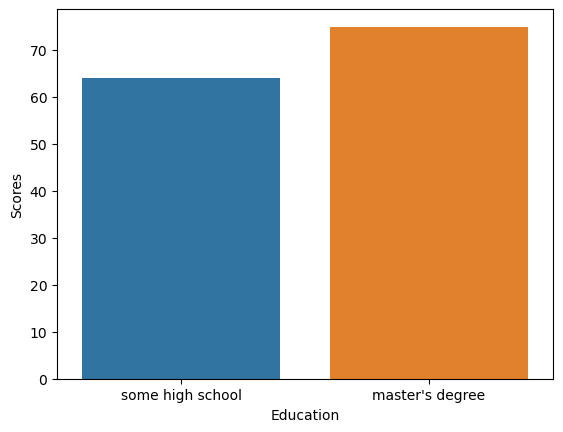

In [13]:
sns.barplot(data = high_low_df, x = 'Education', y = 'Scores')